In [131]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.optimize import curve_fit

In [184]:
#Define constants
V0 = -61.1 #MeV
A = 10 #mass of the core
Rws = 1.2*A**(1/3) #fm
aws = 0.65 #fm

c1 = 197.32075 #MeV fm -> hc
c2 = 0.0478450 #1/(MeV fm2) -> 2u/hbar2

#The Woods Saxon potential is
def V(R):
    """Woode-Saxon potential"""
    return V0/(1+np.exp((R-Rws)/aws))


def f(R,y,L,E):
    """Matrix solutions to RKmethod f(R,y)=(u(1),u(0)* [RHS equation 3.126])"""
    return np.array([[y[1,0]],[y[0,0]*(L*(L+1)/R**2 + c2*(V(R)-E))]])

def RKmethod(Rn=np.array([]),yn=np.array([[0],[1]]),Lval=0,Eval=0):
    """Runge-Kutta Method: It is initialized for u(0)=0 and u'(0)=1.
    The parameter "a" will help us identify the index for which r==a in the index notation."""
    u  = []
    up = [] #u'
    step_size = r_array[1]-r_array[0]
    for idx, Rn in enumerate(r_array):
        #define the parameters
        k1 = f(R=Rn,y=yn,L=Lval,E=Eval)
        k2 = f(R=Rn+0.5*step_size,y=yn+0.5*step_size*k1,L=Lval,E=Eval)
        k3 = f(R=Rn+0.5*step_size,y=yn+0.5*step_size*k2,L=Lval,E=Eval)
        k4 = f(R=Rn+step_size,y=yn+step_size*k3,L=Lval,E=Eval)
        #Redefine new functions
        yn = yn + (step_size/6)*(k1+2*k2+2*k3+k4)
        Rn = Rn + step_size
        u.append(yn[0,0])
        up.append(yn[1,0])
    return u,up #u(r)

def normalize(array_to_normalize):
    """ It normalizes an array from its maximum amplitude and will oscillate from [-1,1]"""
    normalized_array = array_to_normalize/max(array_to_normalize)
    return normalized_array

# def Rmatrix(u,up,idx_a,a):
#     """Equation 3.1.28"""
#     # "a" is the outside the nuclear range when the potential is zero
#     return u[idx_a]/up[idx_a]/a

# def Hankel(R=0.1,k=0.5,L=0,sign=+1):
#     return 1j**(-1*sign*L)*np.exp(sign*1j*R*k)

# def Hankel_derivative(R=0.1,k=0.5,L=0,sign=+1):
#     return 1j**(-1*sign*L)*np.exp(sign*1j*R*k)*(sign*1j*k)

# def Smatrix(r,Rm,L,a,k):
#     return ( 
#         (Hankel(R=a,k=k,L=L,sign=-1) - a*Rm*Hankel_derivative(R=a,k=k,L=L,sign=-1)) /
#             (Hankel(R=a,k=k,L=L,sign=1) - a*Rm*Hankel_derivative(R=a,k=k,L=L,sign=1)) 
#     )

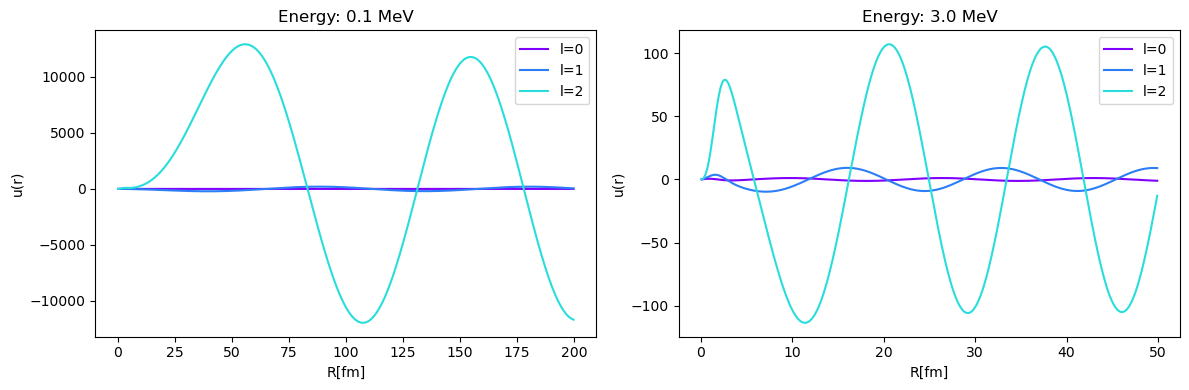

In [201]:
#Initial conditions
step_size = 0.1
a = 10 #potential is zero ish
##Plot figures
fig, axs = plt.subplots(1,2,figsize=(12.0,4.0))
numbers_of_l = 3
energies = [0.1,3.0]
for idx,energy in enumerate(energies):
    color = iter(cm.rainbow(np.linspace(0,0.5,numbers_of_l+1)))
    c = next(color)
    k = np.sqrt(c2*energy) #1/(MeV fm2) -> 2u/hbar2
    
    #Define range of R limits
    if idx ==0: r_array = np.arange(0.1,200,step_size)
    else: r_array = np.arange(0.1,50,step_size)

    if idx ==0: axs[idx].set_title(f'Energy: {energy} MeV')
    else: axs[idx].set_title(f'Energy: {energy} MeV')

    for l in range(0,numbers_of_l):
        y,yp = RKmethod(Rn=r_array,Lval=l,Eval=energy)
        # Rl = Rmatrix(y,yp,idx_a,a)
        # Sl = Smatrix(r=a,Rm=Rl,L=l,a=a,k=k)
        # dl = 1/(2j)*np.log(Sl)
        # y_norm = normalize(y)
        y_norm = y
        axs[idx].plot(r_array, y_norm,label=f"l={l}",color=c)
        axs[idx].set_xlabel("R[fm]")
        axs[idx].set_ylabel("u(r)")
        axs[idx].legend()
        c = next(color)

fig.tight_layout()
fig.savefig('radial_behaviour.png')

/tmp/ipykernel_209/332928776.py:17: RuntimeWarning: invalid value encountered in arccos
  delta1 = np.arccos(param[0])


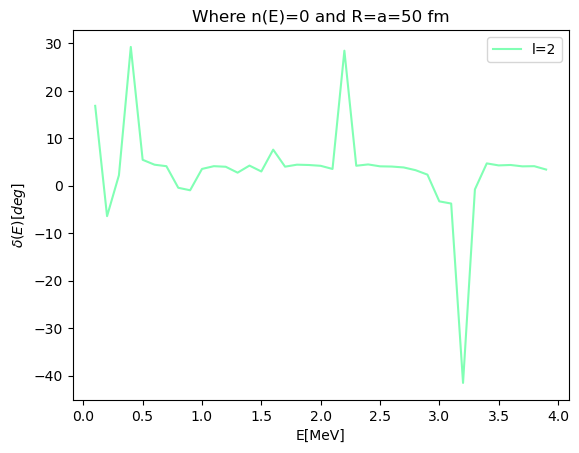

In [200]:
#plot the thing
r_array = np.arange(70,100,step_size)
energy_range = np.arange(0.1,4.0,0.1)
phase_shift = []

#initial parameters
a=50
L=2
for energy in energy_range:
    k = np.sqrt(c2*energy)
    def function(R: float, A:float, B:float):
        return A*np.sin(k*R+ B - L*np.pi/2)
    
    y,yp= RKmethod(Rn=a,Lval=l,Eval=energy)
    # y = normalize(y)
    param, param_cov = curve_fit(function,a,y)
    delta1 = np.arccos(param[0])
    delta2 = param[1]+ L*np.pi/2
    # print(f'first delta: {delta1} second delta: {delta2}')
    phase_shift.append(delta2)

plt.plot(energy_range,phase_shift,label=f'l={L}',c=c)

plt.title(f"Where n(E)=0 and R=a={a} fm")
plt.ylabel(r'$\delta(E) [deg]$')
plt.xlabel(r'E[MeV]')
plt.legend()
plt.show()

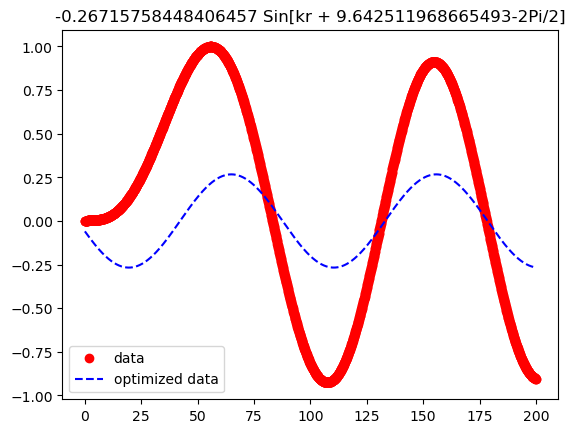

In [199]:
#Fit the Phase shift 


c2 = 0.0478450
energy = 0.1
k = np.sqrt(c2*energy)
L=2

r_array = np.arange(0.1,200,step_size)
y,yp = RKmethod(Rn=r_array,Lval=L,Eval=energy)
y = normalize(y)
def function(R: float, A:float, B:float):
    return A*np.sin(k*R+ B - L*np.pi/2)

param, param_cov = curve_fit(function,r_array,y)
ans = (param[0]*(np.sin(k*r_array + param[1] - L*np.pi/2)))
 
'''Below 4 lines can be un-commented for plotting results 
using matplotlib as shown in the first example. '''
 
plt.plot(r_array, y, 'o', color ='red', label ="data")
plt.plot(r_array, ans, '--', color ='blue', label ="optimized data")
plt.title(f'{param[0]} Sin[kr + {param[1]}-{L}Pi/2]')
plt.legend()
plt.show()


(2.5002705923548723e-17+2.4619267929188267j) 2.4619267929188267j
(7.431581804280563e-17+2.188615987623549j) (8.326672684688673e-17+2.188615987623549j)
(-1.7726497070345955e-17+1.9846895435025542j) (-2.7755575615628914e-17+1.9846895435025542j)
(8.449389984398115e-17+1.8177662562928791j) (8.673617379884034e-17+1.8177662562928791j)
(4.402586505090639e-17+1.6752182537431004j) (4.423544863740858e-17+1.6752182537431004j)
(6.730632220906599e-17+1.5505298578468685j) (6.732895491134983e-17+1.5505298578468685j)
(7.6239587681053e-17+1.439807467820653j) (7.632783294297951e-17+1.439807467820653j)
(-1.1773052667727093e-16+1.340498083675845j) (-1.144917494144693e-16+1.340498083675845j)
(-9.254019601170223e-17+1.2508153016295713j) (-9.714451465470121e-17+1.2508153016295713j)
(2.296787958301173e-17+1.1694465697914844j) (2.7755575615628914e-17+1.1694465697914844j)
(8.087731595229691e-17+1.095389404510257j) (8.326672684688673e-17+1.095389404510257j)
(2.94768716558424e-17+1.0278531315720063j) (2.775557561

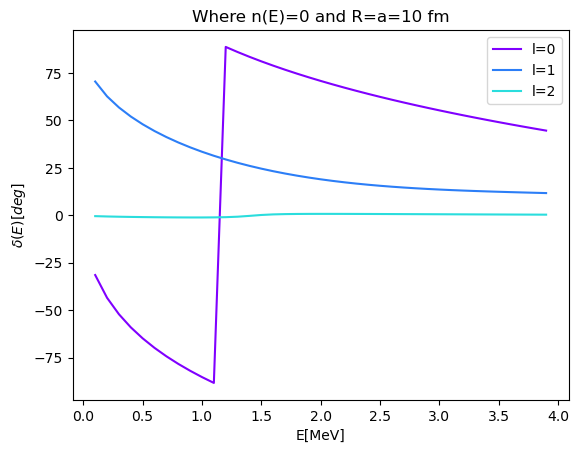

In [71]:
#Define ranges
energy_range = np.arange(0.1,4.0,0.1)
r_array = np.arange(0.1,100,step_size)

phase_shift = []
#Initial parameters
numbers_of_l = 3
#if we select the R=a for which V~0 for the nuclear range
a = 10
color = iter(cm.rainbow(np.linspace(0,0.5,numbers_of_l+1)))
c = next(color)
for energy in energy_range:
    k = np.sqrt(c2*energy)
    y_l0, yp_l0, idx_a = RKmethod(Rn=r_array,Lval=0,Eval=energy,a=a)
    R_l0 = Rmatrix(y_l0,yp_l0,idx_a,a)
    S_l0 = Smatrix(r=a,Rm=R_l0,L=0,a=a,k=k)
    d_l0 = 1/(2j)*np.log(S_l0)
    phase_shift.append(d_l0)

plt.plot(energy_range,np.rad2deg(np.real(phase_shift)),label='l=0',c=c)
import cmath
phase_shift = []
for energy in energy_range:
    k = np.sqrt(c2*energy)
    y_l0, yp_l0, idx_a = RKmethod(Rn=r_array,Lval=1,Eval=energy,a=a)
    R_l0 = Rmatrix(y_l0,yp_l0,idx_a,a)
    S_l0 = Smatrix(r=a,Rm=R_l0,L=1,a=a,k=k)
    print(np.log(S_l0),cmath.log(S_l0))
    d_l0 = 1/(2j)*np.log(S_l0)
    phase_shift.append(d_l0)

c = next(color)
plt.plot(energy_range,np.rad2deg(np.real(phase_shift)),label='l=1',c=c)


phase_shift = []
for energy in energy_range:
    k = np.sqrt(c2*energy)
    y_l0, yp_l0, idx_a = RKmethod(Rn=r_array,Lval=2,Eval=energy,a=a)
    R_l0 = Rmatrix(y_l0,yp_l0,idx_a,a)
    S_l0 = Smatrix(r=a,Rm=R_l0,L=2,a=a,k=k)
    d_l0 = 1/(2j)*np.log(S_l0)
    phase_shift.append(d_l0)
    
c = next(color)
plt.plot(energy_range,np.real(phase_shift),label='l=2',c=c)

plt.title(f"Where n(E)=0 and R=a={a} fm")
plt.ylabel(r'$\delta(E) [deg]$')
plt.xlabel(r'E[MeV]')
plt.legend()
plt.savefig('phase_shift_a8.png')
plt.show()

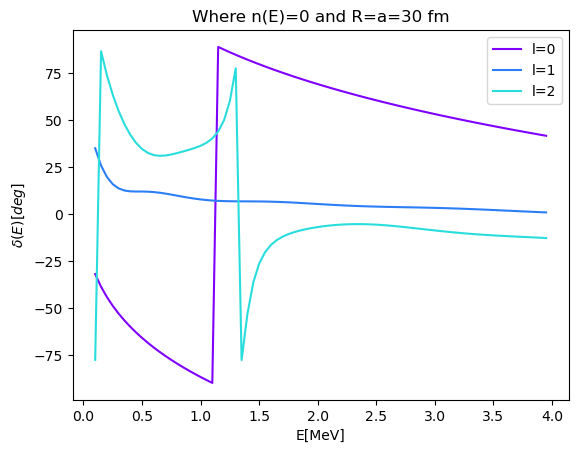

In [68]:
#Define ranges
step_size = 0.1
energy_range = np.arange(0.1,4.0,0.05)
r_array = np.arange(0.1,100,step_size)

phase_shift = []
#Initial parameters
numbers_of_l = 3
#if we select the R=a for which V~0 for the nuclear range
a = 20 #fm
color = iter(cm.rainbow(np.linspace(0,0.5,numbers_of_l+1)))  
c = next(color)
for energy in energy_range:
    k = np.sqrt(c2*energy)
    y_l0, yp_l0, idx_a = RKmethod(Rn=r_array,Lval=0,Eval=energy,a=a)
    R_l0 = Rmatrix(y_l0,yp_l0,idx_a,a)
    S_l0 = Smatrix(r=a,Rm=R_l0,L=0,a=a,k=k)
    d_l0 = 1/(2j)*np.log(S_l0)
    phase_shift.append(d_l0)

plt.plot(energy_range,np.rad2deg(np.real(phase_shift)),label='l=0',c=c)

phase_shift = []
for energy in energy_range:
    k = np.sqrt(c2*energy)
    y_l0, yp_l0, idx_a = RKmethod(Rn=r_array,Lval=1,Eval=energy,a=a)
    R_l0 = Rmatrix(y_l0,yp_l0,idx_a,a)
    S_l0 = Smatrix(r=a,Rm=R_l0,L=1,a=a,k=k)
    d_l0 = 1/(2j)*np.log(S_l0)
    phase_shift.append(d_l0)

c = next(color)
plt.plot(energy_range,np.rad2deg(np.real(phase_shift)),label='l=1',c=c)


phase_shift = []
for energy in energy_range:
    k = np.sqrt(c2*energy)
    y_l0, yp_l0, idx_a = RKmethod(Rn=r_array,Lval=2,Eval=energy,a=a)
    R_l0 = Rmatrix(y_l0,yp_l0,idx_a,a)
    S_l0 = Smatrix(r=a,Rm=R_l0,L=2,a=a,k=k)
    d_l0 = 1/(2j)*np.log(S_l0)
    phase_shift.append(d_l0)
    
c = next(color)
plt.plot(energy_range,np.rad2deg(np.real(phase_shift)),label='l=2',c=c)

plt.title(f"Where n(E)=0 and R=a={a} fm")
plt.ylabel(r'$\delta(E) [deg]$')
plt.xlabel(r'E[MeV]')
plt.legend()

plt.savefig(f'phase_shift_a{a}.png')
plt.show()

In [16]:
def breit_wigner(L: int, delta: float,E: float):   
    c2 = 0.0478450
    k2 = c2*E #k^2
    return (4*np.pi*(2*L+1)*(np.sin(delta))**2)/k2

In [17]:
cross_section=breit_wigner(L=2,delta=phase_shift,E=energy_range)
# print(cross_section)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


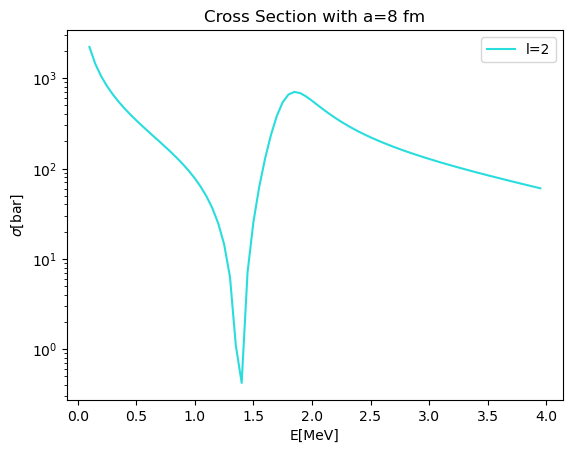

In [18]:
plt.plot(energy_range,cross_section,label='l=2',c=c)

plt.title(f"Cross Section with a={a} fm")
plt.ylabel(r'$\sigma$[bar]')
plt.xlabel(r'E[MeV]')
plt.legend()
plt.yscale('log')
plt.show()